<a href="https://colab.research.google.com/github/pcashman21/feral-cat-census/blob/main/train_yolo_pose_estimation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook trains a YOLOv8 pose estimation model downloaded from the Roboflow project feral-cat-pose-detection-4, which is in the account for pc232@cornell.edu.  As of March 1, 2024 there are three version of the training dataset:

- v1i has no augmentations
- v2i has two augmentations
- v3i has five augmentations

However, the free version of Roboflow does not allow for all the augmented images to be included in the training, so the results for training with versions v2i and v3i are identical.

In [1]:
# Create the Colab folder into which to unzip the training/test data set
!mkdir data

The Roboflow dataset includes a data.yaml file which points to the training, test, and validation datasets.  Before uploading to Colab, the data.yaml file must be edited so these file pointers are relevant to the Colab file structure.  Then the data.yaml file and the image files can be zipped and uploaded to Colab.

In [ ]:
!unzip /content/feral-cat-pose-detection-4.v3i.yolov5pytorch.zip /content/data

In [ ]:
# Verify that the data.yaml file points to /content/data/training/... and similar pointers for the test and validation image sets
!cat /content/data/data.yaml

In [ ]:
!pip install ultralytics

In [5]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [6]:
# Build and train a YOLO v8 pose estimation model.  See https://docs.ultralytics.com/tasks/pose/ for details
model = YOLO('yolov8m-pose.yaml')  # build a new model from YAML
project = '/content/data/results'
name = '200-epochs-'

results = model.train(data='/content/data/data.yaml', epochs=200, project=project, name=name, patience=0, batch=4, imgsz=640)

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8m-pose.yaml, data=/content/data/data.yaml, epochs=200, time=None, patience=0, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/data/results, name=200-epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 20.3MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[20, 3]

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1 

100%|██████████| 6.23M/6.23M [00:00<00:00, 124MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 1001.82it/s]

train: New cache created: /content/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/valid/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 772.62it/s]

val: New cache created: /content/data/valid/labels.cache


Plotting labels to /content/data/results/200-epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 83 weight(decay=0.0), 93 weight(decay=0.0005), 92 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/data/results/200-epochs-
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.24G      3.462      10.55     0.7055      3.564      4.179         26        640: 100%|██████████| 23/23 [00:12<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all         25         92    0.00733      0.598     0.0275     0.0113          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.43G      3.411      10.46     0.6954      3.449      4.138         30        640: 100%|██████████| 23/23 [00:08<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all         25         92    0.00747      0.609     0.0169     0.0046          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.43G      3.503      10.54     0.6936      3.428      4.094         15        640: 100%|██████████| 23/23 [00:08<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all         25         92    0.00747      0.609     0.0295     0.0072          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.43G      3.332      10.47     0.6872      3.291      4.075         14        640: 100%|██████████| 23/23 [00:09<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.46it/s]

                   all         25         92    0.00635      0.467    0.00505    0.00149          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.43G      3.297      10.64     0.6805      3.396      4.022         33        640: 100%|██████████| 23/23 [00:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all         25         92     0.0218       0.12     0.0135    0.00385          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.43G       3.34      10.28     0.6771       3.36      3.994          8        640: 100%|██████████| 23/23 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all         25         92     0.0272      0.228     0.0141    0.00514          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.43G      3.235      10.32     0.6718      3.288      3.929         27        640: 100%|██████████| 23/23 [00:08<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all         25         92     0.0192       0.25     0.0128    0.00376          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.44G      3.302       10.7     0.6753      3.302      3.834         21        640: 100%|██████████| 23/23 [00:08<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all         25         92     0.0339      0.272     0.0194    0.00569          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.42G      3.204      10.44      0.658      3.374      3.744         14        640: 100%|██████████| 23/23 [00:08<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all         25         92     0.0358      0.261     0.0182    0.00483          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.43G      3.155      10.53      0.645       3.13      3.656          6        640: 100%|██████████| 23/23 [00:09<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         25         92     0.0284     0.0978    0.00925    0.00224          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.46G      3.179      10.36     0.6626      3.292      3.684         19        640: 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all         25         92     0.0325      0.109     0.0137    0.00355          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.45G      3.073      10.61     0.6499      3.245      3.593          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.77it/s]

                   all         25         92     0.0369       0.13     0.0176     0.0042          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.45G      3.146      10.33     0.6519      3.251      3.633         10        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all         25         92      0.038     0.0652     0.0219    0.00557          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.45G      3.288      10.77     0.6424      3.272      3.628         27        640: 100%|██████████| 23/23 [00:08<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all         25         92      0.023      0.315     0.0578      0.011          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.45G      3.232      10.16     0.6393      3.248      3.609         13        640: 100%|██████████| 23/23 [00:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]

                   all         25         92     0.0121      0.696     0.0534     0.0117          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.45G       3.11      10.29     0.6482      3.198      3.533         13        640: 100%|██████████| 23/23 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         25         92     0.0246      0.315     0.0374     0.0113          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.45G      3.011      10.34     0.6567      3.211      3.485          9        640: 100%|██████████| 23/23 [00:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all         25         92    0.00952      0.761     0.0543     0.0141          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.47G      2.989      10.56     0.6612      3.214      3.458         12        640: 100%|██████████| 23/23 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all         25         92    0.00893      0.728     0.0254    0.00737          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.45G       2.96      10.28     0.6494      3.252      3.451         17        640: 100%|██████████| 23/23 [00:07<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all         25         92    0.00853      0.696     0.0189    0.00554          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.45G      3.001      10.37     0.6277      3.139      3.376         13        640: 100%|██████████| 23/23 [00:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         25         92     0.0235      0.413     0.0207    0.00594          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.44G      3.005      10.37     0.6393      3.213       3.44         16        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.47it/s]

                   all         25         92    0.00976      0.761     0.0284     0.0081          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.44G       2.92      10.27     0.6418      3.264      3.417          6        640: 100%|██████████| 23/23 [00:08<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all         25         92    0.00933      0.761      0.053     0.0147          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.44G      3.027      10.01     0.6325      3.208      3.372         21        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all         25         92     0.0088      0.717     0.0322    0.00843          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.45G      2.889      10.39     0.6354      3.244      3.342         13        640: 100%|██████████| 23/23 [00:10<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]

                   all         25         92    0.00853      0.696     0.0371    0.00871          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.45G      2.971      10.33     0.6289      3.133      3.371         10        640: 100%|██████████| 23/23 [00:09<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all         25         92     0.0096      0.783     0.0542      0.013          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.45G      2.996      10.27     0.6267      3.199      3.386          8        640: 100%|██████████| 23/23 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]

                   all         25         92     0.0102      0.815     0.0425      0.011          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.45G      2.866      10.33     0.6262      3.104      3.349         16        640: 100%|██████████| 23/23 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all         25         92    0.00933      0.761     0.0532     0.0115          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.45G      2.856      10.13     0.6156      3.076      3.291          8        640: 100%|██████████| 23/23 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all         25         92     0.0092       0.75     0.0842     0.0161          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.45G      2.802      10.31     0.6281      3.215      3.352          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]

                   all         25         92     0.0112      0.913     0.0851     0.0198          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.46G       2.87      10.34     0.6313      3.175      3.366          8        640: 100%|██████████| 23/23 [00:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.49it/s]

                   all         25         92     0.0105      0.859     0.0627     0.0161          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.44G      2.876       10.3     0.6435      3.228      3.328          8        640: 100%|██████████| 23/23 [00:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.54it/s]

                   all         25         92     0.0108       0.88     0.0658     0.0169          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.44G      2.814      10.24     0.6332       3.18      3.287         22        640: 100%|██████████| 23/23 [00:06<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all         25         92     0.0105      0.859     0.0698     0.0192          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.44G      2.792      10.39     0.6338       3.18      3.239         20        640: 100%|██████████| 23/23 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all         25         92     0.0224      0.652     0.0754     0.0183          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.45G      2.902      10.21     0.6178      3.053      3.229         12        640: 100%|██████████| 23/23 [00:09<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all         25         92     0.0109       0.75      0.059     0.0131          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.46G      2.835      10.19     0.6417      3.093      3.203         16        640: 100%|██████████| 23/23 [00:10<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         25         92     0.0107      0.772     0.0623     0.0128          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.45G      2.781      10.26     0.6233      3.197       3.23          6        640: 100%|██████████| 23/23 [00:07<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all         25         92     0.0088      0.717     0.0323    0.00803          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.45G      2.862      10.39     0.6299      3.156      3.208         41        640: 100%|██████████| 23/23 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all         25         92      0.035     0.0543     0.0297    0.00709          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.45G      2.799       9.72     0.6196      3.134        3.2          7        640: 100%|██████████| 23/23 [00:07<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.73it/s]

                   all         25         92       0.01      0.815     0.0279    0.00842          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.45G      2.733      9.938     0.6172      3.154      3.173          3        640: 100%|██████████| 23/23 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         25         92       0.01      0.815     0.0251    0.00716          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.46G      2.814      10.24       0.61       3.09      3.186         10        640: 100%|██████████| 23/23 [00:09<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all         25         92     0.0187      0.446      0.035    0.00824          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.45G      2.779      9.961     0.6253      3.084      3.189          8        640: 100%|██████████| 23/23 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all         25         92      0.029      0.391     0.0572     0.0118          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.45G      2.804      9.971     0.6163      3.136      3.206          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all         25         92     0.0441      0.348     0.0617     0.0161   0.000133     0.0109   6.77e-05   6.77e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.45G      2.678       9.96     0.6269      3.156      3.137         12        640: 100%|██████████| 23/23 [00:09<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all         25         92     0.0112      0.913     0.0563     0.0146          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.45G      2.765      10.34     0.6173      3.065      3.179          6        640: 100%|██████████| 23/23 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all         25         92     0.0109      0.891     0.0376    0.00982          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.46G      2.718      9.965     0.6318      3.143      3.156         13        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all         25         92    0.00987      0.804     0.0234    0.00631          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.45G      2.788      9.916     0.6018      3.166      3.222         15        640: 100%|██████████| 23/23 [00:09<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all         25         92       0.01      0.815     0.0278    0.00757          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.45G      2.709         10     0.6285      3.037      3.122         22        640: 100%|██████████| 23/23 [00:08<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all         25         92    0.00947      0.772     0.0467     0.0133   0.000133     0.0109   6.78e-05   6.78e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.45G      2.682         10     0.6189      3.075      3.126         13        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all         25         92    0.00973      0.793     0.0607     0.0157   0.000133     0.0109   6.84e-05   6.84e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.43G      2.684      10.08      0.621      3.072      3.108         22        640: 100%|██████████| 23/23 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]

                   all         25         92     0.0104      0.848     0.0655      0.017   0.000133     0.0109   6.86e-05   6.86e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.46G      2.686      10.13     0.6084       3.03      3.085         24        640: 100%|██████████| 23/23 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         25         92     0.0382      0.543     0.0688     0.0178   0.000133     0.0109   6.76e-05   6.76e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.44G      2.743      9.978     0.6387      3.089      3.106          8        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all         25         92     0.0351      0.554      0.064     0.0181   0.000133     0.0109   6.75e-05   6.75e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.43G      2.724      9.932     0.6289      3.194       3.09         14        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all         25         92     0.0101      0.826     0.0629     0.0184   0.000133     0.0109   6.75e-05   6.75e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.45G      2.651      10.11     0.6153      3.153      3.098         11        640: 100%|██████████| 23/23 [00:10<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]

                   all         25         92     0.0105      0.859     0.0782     0.0231   0.000133     0.0109   6.76e-05   6.76e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.45G      2.739      9.979     0.6122      3.072      3.119         34        640: 100%|██████████| 23/23 [00:05<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]

                   all         25         92       0.01      0.815     0.0542     0.0143          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.43G      2.666      10.08     0.6279      3.073      3.096         12        640: 100%|██████████| 23/23 [00:06<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all         25         92     0.0105      0.859     0.0583     0.0154          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.45G      2.671      10.09     0.6157      3.134       3.09          3        640: 100%|██████████| 23/23 [00:09<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all         25         92     0.0203       0.73     0.0867     0.0187          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.45G      2.586      9.882     0.6235       3.03      3.053         11        640: 100%|██████████| 23/23 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all         25         92     0.0205      0.652     0.0841     0.0192          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.45G      2.652      10.09     0.6211      3.082      3.086         21        640: 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         25         92     0.0167      0.674     0.0457     0.0116          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.45G      2.663      9.956     0.6121      3.019      3.086          7        640: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all         25         92     0.0179      0.685     0.0474     0.0129          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.45G      2.691      10.23     0.6176      3.061       3.05          5        640: 100%|██████████| 23/23 [00:05<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         25         92     0.0128      0.859      0.058     0.0158          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.45G      2.673      10.06     0.6138      3.127      3.083          7        640: 100%|██████████| 23/23 [00:08<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all         25         92     0.0108       0.88     0.0583     0.0147   0.000133     0.0109   6.93e-05   6.93e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.44G      2.631      9.929     0.6312      2.989      3.046         13        640: 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all         25         92     0.0107       0.87     0.0606     0.0153   0.000133     0.0109   6.85e-05   6.85e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.43G      2.536      10.08     0.6122      3.062       3.04          7        640: 100%|██████████| 23/23 [00:10<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all         25         92     0.0107       0.87     0.0656     0.0174   0.000133     0.0109   6.77e-05   6.77e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.45G      2.654      10.21     0.6212      3.063       3.04         23        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all         25         92     0.0103      0.837     0.0408      0.011   0.000133     0.0109   6.78e-05   6.78e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.44G      2.623       9.77     0.6142      3.086       3.05          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all         25         92    0.00987      0.804     0.0381     0.0102   0.000133     0.0109    6.9e-05    6.9e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.46G      2.599      9.973     0.6094      3.048      3.025          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all         25         92     0.0138      0.815      0.066     0.0176   0.000133     0.0109    6.9e-05    6.9e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.46G      2.582      9.808     0.6024      3.045      3.041         30        640: 100%|██████████| 23/23 [00:08<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all         25         92     0.0515      0.598     0.0703     0.0177   0.000133     0.0109   6.88e-05   6.88e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.45G      2.513      10.09     0.6029      3.026          3         10        640: 100%|██████████| 23/23 [00:08<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all         25         92      0.099      0.217      0.065     0.0172   0.000133     0.0109   6.91e-05   6.91e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.45G      2.573      10.08     0.6075      2.954      3.015         13        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all         25         92     0.0767      0.391     0.0656     0.0182   0.000133     0.0109   6.76e-05   1.35e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.45G      2.544      10.06     0.6197      3.081      3.038         11        640: 100%|██████████| 23/23 [00:10<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all         25         92     0.0259      0.728     0.0915     0.0247   0.000133     0.0109   6.75e-05   6.75e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.45G       2.55       9.94     0.5991      3.072      3.036         12        640: 100%|██████████| 23/23 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]

                   all         25         92       0.05      0.543     0.0967     0.0276          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.45G      2.508      9.974     0.5996      3.048      3.022         17        640: 100%|██████████| 23/23 [00:10<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all         25         92     0.0464      0.402     0.0731     0.0204          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.45G      2.582      9.941        0.6      3.039       3.04          6        640: 100%|██████████| 23/23 [00:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all         25         92     0.0455       0.38     0.0571     0.0171          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.44G      2.513      9.773     0.6129      2.984      2.988         11        640: 100%|██████████| 23/23 [00:08<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]

                   all         25         92     0.0879      0.261     0.0763     0.0186   0.000133     0.0109   6.86e-05   6.86e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.45G      2.529      9.955     0.6029      2.971      2.997         11        640: 100%|██████████| 23/23 [00:08<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all         25         92     0.0957      0.283     0.0821     0.0194   0.000133     0.0109   6.92e-05   6.92e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.45G      2.585      10.17     0.5809      2.998          3         11        640: 100%|██████████| 23/23 [00:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]

                   all         25         92     0.0788      0.272     0.0833     0.0193   0.000133     0.0109   6.87e-05   6.87e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.44G      2.478      9.988     0.5866      2.945      2.955          8        640: 100%|██████████| 23/23 [00:09<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.83it/s]

                   all         25         92     0.0966      0.391      0.127     0.0362          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.45G      2.488      9.901     0.6021      2.963      2.955         23        640: 100%|██████████| 23/23 [00:09<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.57it/s]

                   all         25         92      0.117      0.359      0.139     0.0355          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.45G      2.629      9.634     0.6283      3.001      3.023         14        640: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]

                   all         25         92     0.0442      0.598     0.0756     0.0199   0.000267     0.0217   0.000137   2.06e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.45G      2.522      9.759     0.6222      2.962      2.909          8        640: 100%|██████████| 23/23 [00:08<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         25         92     0.0709      0.402      0.103     0.0254   0.000133     0.0109   6.86e-05   6.86e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.44G       2.53      10.03     0.6045      2.933      2.973          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all         25         92     0.0763      0.446     0.0955     0.0271   0.000133     0.0109   7.53e-05   7.53e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.46G      2.531      9.974     0.6186      2.864        2.9         16        640: 100%|██████████| 23/23 [00:08<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all         25         92     0.0485      0.543     0.0739     0.0223   0.000133     0.0109    7.3e-05    7.3e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.45G      2.484      9.847     0.5999      2.837      2.927         22        640: 100%|██████████| 23/23 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all         25         92     0.0566      0.435       0.06     0.0186   0.000133     0.0109   7.05e-05   7.05e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.44G      2.477      9.657     0.5959      2.934      2.903         10        640: 100%|██████████| 23/23 [00:06<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all         25         92     0.0461      0.467     0.0687     0.0196   0.000133     0.0109   6.89e-05   6.89e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.45G      2.515      10.02     0.6011      2.916      2.939         18        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]

                   all         25         92     0.0742       0.38     0.0765     0.0215          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.45G       2.45       9.86     0.5925      2.838      2.882         21        640: 100%|██████████| 23/23 [00:09<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all         25         92     0.0895      0.239     0.0777     0.0217   0.000267     0.0217   0.000164   1.64e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.45G      2.497      9.578     0.5977      2.951      2.934         12        640: 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all         25         92      0.142      0.196     0.0986     0.0262   0.000133     0.0109   7.61e-05   7.61e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.45G      2.461      9.893     0.6016      2.927      2.938         21        640: 100%|██████████| 23/23 [00:09<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all         25         92       0.19      0.217      0.145      0.038   0.000133     0.0109   7.28e-05   7.28e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.45G      2.479      9.968      0.591      2.955      2.944         20        640: 100%|██████████| 23/23 [00:10<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all         25         92      0.202      0.217      0.198     0.0465   0.000133     0.0109   7.64e-05   7.64e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.45G       2.53      10.09     0.6193      2.834      2.969         12        640: 100%|██████████| 23/23 [00:09<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all         25         92      0.194       0.13     0.0907     0.0226   0.000133     0.0109   0.000102   1.02e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.45G       2.48      9.871     0.6056       2.77      2.882         16        640: 100%|██████████| 23/23 [00:08<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all         25         92       0.13      0.087     0.0611     0.0165   0.000267     0.0217   0.000185   2.53e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.45G      2.428      9.782     0.6075       2.84      2.899         12        640: 100%|██████████| 23/23 [00:09<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.60it/s]

                   all         25         92      0.138       0.13     0.0656     0.0173   0.000267     0.0217   0.000158   2.25e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.45G      2.471       9.82     0.5882       2.75      2.882         10        640: 100%|██████████| 23/23 [00:08<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all         25         92       0.13      0.261      0.102     0.0289          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.45G      2.457      9.839     0.5963      2.805      2.888         36        640: 100%|██████████| 23/23 [00:09<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all         25         92      0.147      0.228      0.111     0.0353          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.45G      2.445      9.939     0.5926      2.813      2.898         12        640: 100%|██████████| 23/23 [00:09<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all         25         92     0.0903      0.185     0.0752     0.0255   0.000267     0.0217   0.000144   2.12e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.45G       2.48      9.583     0.5975      2.851      2.879          4        640: 100%|██████████| 23/23 [00:09<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.71it/s]

                   all         25         92      0.124      0.141     0.0812     0.0269          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.45G      2.384      9.847     0.6087      2.683      2.824          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all         25         92      0.149      0.185      0.093     0.0282          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.46G      2.391      9.792     0.6071      2.717      2.822          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]

                   all         25         92       0.14      0.207      0.116     0.0332          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.44G       2.43      9.748     0.5997       2.85       2.84          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         25         92      0.161      0.261      0.132     0.0349    0.00014     0.0109     0.0001      1e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.46G      2.385      9.882     0.5776      2.851      2.858         10        640: 100%|██████████| 23/23 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         25         92      0.184      0.337      0.149     0.0432          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.45G      2.403      9.978     0.6014      2.714      2.804         18        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.90it/s]

                   all         25         92      0.187      0.358      0.168     0.0467          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.45G      2.392       9.45      0.615      2.719      2.819         13        640: 100%|██████████| 23/23 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all         25         92      0.147      0.217      0.112     0.0327          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.45G      2.424      9.722     0.5957      2.666      2.825          8        640: 100%|██████████| 23/23 [00:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all         25         92      0.154       0.25      0.132      0.038          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.47G      2.445       9.84     0.5959      2.824       2.88          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all         25         92        0.1      0.185      0.081     0.0258          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.45G        2.4      9.542      0.593      2.696      2.836         14        640: 100%|██████████| 23/23 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all         25         92      0.156      0.141      0.117      0.033          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.45G      2.392      9.865     0.6101      2.695      2.817          9        640: 100%|██████████| 23/23 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         25         92      0.174      0.196      0.138     0.0384          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.45G      2.343      9.764     0.6107      2.768      2.846          9        640: 100%|██████████| 23/23 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.55it/s]

                   all         25         92      0.131      0.283      0.108     0.0352   0.000247     0.0109   0.000114   1.14e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.46G      2.411       10.1     0.5848      2.738       2.81         21        640: 100%|██████████| 23/23 [00:08<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all         25         92       0.14      0.228      0.104     0.0356   0.000214     0.0109   0.000105   1.05e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.45G      2.334      9.662     0.5841      2.713        2.8         14        640: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]

                   all         25         92      0.156      0.196      0.127     0.0456          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.45G      2.381      9.777     0.6075      2.687      2.817          6        640: 100%|██████████| 23/23 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25         92      0.162      0.185      0.144      0.045   0.000133     0.0109   6.74e-05   6.74e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.45G       2.35       9.67     0.6015      2.644      2.763         11        640: 100%|██████████| 23/23 [00:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all         25         92      0.167      0.239      0.165     0.0477   0.000133     0.0109    6.8e-05    6.8e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.45G      2.312      9.811     0.5997      2.592      2.782         21        640: 100%|██████████| 23/23 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         25         92      0.155      0.207      0.149     0.0458   0.000133     0.0109   6.81e-05   6.81e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.45G      2.381      9.814     0.5825      2.691      2.822         11        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all         25         92      0.156      0.163      0.119     0.0444   0.000223     0.0109   0.000209   2.09e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.45G      2.299      9.898     0.5885        2.6      2.762         15        640: 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all         25         92      0.152      0.163      0.129     0.0426   0.000267     0.0217   0.000203   2.03e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.44G      2.328      9.823     0.5971      2.533      2.767         10        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all         25         92      0.211      0.163      0.146     0.0449   0.000267     0.0217    0.00019    1.9e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.45G      2.354      9.918     0.5934      2.598      2.778         27        640: 100%|██████████| 23/23 [00:09<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all         25         92      0.205      0.217      0.163     0.0566   0.000133     0.0109   8.62e-05   8.62e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.45G      2.337      9.628     0.6031      2.608      2.737         20        640: 100%|██████████| 23/23 [00:09<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all         25         92      0.231      0.196      0.172      0.057   0.000133     0.0109   8.34e-05   8.34e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.44G      2.329      9.981      0.606      2.548      2.764         27        640: 100%|██████████| 23/23 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]


                   all         25         92      0.171      0.196      0.162     0.0532   0.000133     0.0109    7.8e-05    7.8e-06

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.45G      2.348      9.635     0.5931      2.617      2.729          6        640: 100%|██████████| 23/23 [00:10<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.43it/s]

                   all         25         92      0.125      0.207      0.139     0.0483   0.000133     0.0109   7.56e-05   7.56e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.45G      2.296      9.752     0.5826      2.705      2.736         14        640: 100%|██████████| 23/23 [00:09<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all         25         92      0.156      0.348      0.142     0.0539   0.000133     0.0109   7.48e-05   7.48e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.44G      2.284      9.448     0.5733      2.678      2.735          9        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all         25         92      0.176      0.359      0.166     0.0623   0.000267     0.0217   0.000142   1.42e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.43G      2.295      9.905     0.5871      2.661      2.754         21        640: 100%|██████████| 23/23 [00:08<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all         25         92      0.226      0.304      0.195     0.0683     0.0004     0.0326   0.000238   2.38e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.45G      2.229      9.821     0.5895      2.629      2.697         19        640: 100%|██████████| 23/23 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         25         92      0.241      0.326      0.189     0.0673   0.000267     0.0217    0.00014    1.4e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.43G      2.265      9.766     0.5812      2.635      2.732         19        640: 100%|██████████| 23/23 [00:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all         25         92      0.214      0.402      0.174     0.0635   0.000133     0.0109   6.77e-05   6.77e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.45G      2.274      9.724     0.5911      2.532      2.721         14        640: 100%|██████████| 23/23 [00:08<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.83it/s]

                   all         25         92      0.154      0.315       0.15     0.0423   0.000133     0.0109   6.84e-05   6.84e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.45G      2.293       9.49      0.594       2.57      2.714          6        640: 100%|██████████| 23/23 [00:08<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all         25         92      0.148       0.25      0.145     0.0431   0.000133     0.0109   6.84e-05   6.84e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.43G      2.253      9.689     0.5867      2.619      2.743         12        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all         25         92       0.18      0.185      0.169     0.0588   0.000133     0.0109   6.99e-05   6.99e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.45G      2.313      9.626     0.5771      2.585      2.756         19        640: 100%|██████████| 23/23 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         25         92      0.201      0.272       0.17     0.0622   0.000133     0.0109   6.75e-05   6.75e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.45G      2.253      9.617     0.5793      2.602      2.746          6        640: 100%|██████████| 23/23 [00:09<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]


                   all         25         92      0.169      0.159      0.133     0.0426          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.45G      2.196      9.724     0.5885      2.563      2.676          8        640: 100%|██████████| 23/23 [00:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all         25         92      0.147      0.261      0.112     0.0398          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.45G      2.241      9.632     0.5786       2.64      2.748          5        640: 100%|██████████| 23/23 [00:09<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]

                   all         25         92      0.147      0.261      0.121     0.0462          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.43G      2.209      9.751     0.5933      2.507      2.659         20        640: 100%|██████████| 23/23 [00:08<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all         25         92      0.148      0.163      0.137     0.0535          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.45G      2.258      9.756     0.5967      2.575      2.718          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all         25         92      0.163      0.196      0.138     0.0535          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.45G      2.217       9.54     0.5928       2.53      2.665         19        640: 100%|██████████| 23/23 [00:10<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all         25         92      0.183      0.326       0.16     0.0636          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.43G      2.228      9.528     0.5939      2.461      2.659         38        640: 100%|██████████| 23/23 [00:10<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all         25         92      0.207       0.38      0.185     0.0785          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.45G      2.212       9.77     0.6019      2.537      2.661         52        640: 100%|██████████| 23/23 [00:09<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         25         92      0.171       0.38      0.207     0.0867   0.000267     0.0217    0.00014   2.08e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.45G      2.205      9.375     0.5792      2.556      2.644         20        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all         25         92      0.188      0.424      0.208     0.0871   0.000267     0.0217   0.000141   2.08e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.45G      2.254      9.663     0.6109        2.6      2.637          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all         25         92       0.18      0.424      0.191     0.0834   0.000267     0.0217   0.000146   2.14e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.46G      2.156      9.904     0.5891      2.516      2.647         11        640: 100%|██████████| 23/23 [00:08<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.93it/s]

                   all         25         92      0.182      0.402      0.193     0.0811   0.000267     0.0217   0.000151    2.2e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.44G      2.236      9.798     0.5892      2.512      2.648          7        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         25         92      0.191      0.402      0.202     0.0791   0.000267     0.0217   0.000159   2.29e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.45G      2.198      9.646     0.5889      2.543       2.66         24        640: 100%|██████████| 23/23 [00:09<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         25         92      0.198      0.424      0.186      0.069   0.000267     0.0217   0.000168   3.35e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.45G      2.188      9.616     0.5839      2.536      2.686         13        640: 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all         25         92      0.192      0.402       0.17     0.0627   0.000286     0.0217   0.000169   1.69e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.45G      2.187      9.687     0.5912      2.624      2.706         13        640: 100%|██████████| 23/23 [00:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.87it/s]

                   all         25         92      0.195      0.359       0.17     0.0627   0.000133     0.0109   9.16e-05   9.16e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.45G      2.219      9.525     0.5853      2.511      2.679         18        640: 100%|██████████| 23/23 [00:10<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]

                   all         25         92      0.286      0.304      0.184     0.0656   0.000133     0.0109   8.65e-05   8.65e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.43G      2.173      9.585     0.5796      2.524      2.658         18        640: 100%|██████████| 23/23 [00:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all         25         92      0.235      0.239      0.214     0.0742   0.000134     0.0109   7.79e-05   7.79e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.46G      2.183      9.641     0.5902      2.492      2.645         13        640: 100%|██████████| 23/23 [00:09<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.60it/s]

                   all         25         92      0.271       0.25      0.216     0.0772          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.45G      2.133      9.503     0.5794      2.519      2.645         11        640: 100%|██████████| 23/23 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all         25         92      0.259      0.283      0.208     0.0689   0.000134     0.0109   7.17e-05   7.17e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.46G      2.166      9.457     0.5763      2.532      2.639         23        640: 100%|██████████| 23/23 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all         25         92      0.281       0.25      0.182     0.0701   0.000134     0.0109   7.09e-05   7.09e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.45G       2.16      9.886     0.6026      2.448      2.665         30        640: 100%|██████████| 23/23 [00:08<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.47it/s]

                   all         25         92      0.215      0.315      0.191      0.075   0.000133     0.0109   7.04e-05   7.04e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.45G      2.174      9.634     0.5965      2.384       2.62         12        640: 100%|██████████| 23/23 [00:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         25         92      0.225      0.326      0.182     0.0747   0.000133     0.0109   6.88e-05   1.38e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.45G      2.086      9.893     0.5739      2.456      2.609         16        640: 100%|██████████| 23/23 [00:08<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.77it/s]

                   all         25         92      0.207      0.315      0.169     0.0684   0.000133     0.0109   6.82e-05   6.82e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.45G      2.091      9.363     0.5943      2.402      2.578         19        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all         25         92      0.164      0.261      0.139     0.0568   0.000267     0.0217   0.000156   1.56e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.45G      2.108      9.765     0.6068      2.475      2.622         16        640: 100%|██████████| 23/23 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all         25         92      0.168      0.288      0.147     0.0599   0.000134     0.0109      9e-05      9e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.44G       2.15      9.557     0.5906       2.38      2.612         12        640: 100%|██████████| 23/23 [00:09<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]

                   all         25         92      0.162       0.25      0.174     0.0714   0.000269     0.0217   0.000153   2.22e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.46G      2.099      9.484     0.5693      2.492      2.643         10        640: 100%|██████████| 23/23 [00:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all         25         92      0.175      0.326      0.184     0.0771   0.000267     0.0217   0.000151   2.19e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.45G      2.205      9.452      0.596      2.421      2.682         19        640: 100%|██████████| 23/23 [00:09<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]

                   all         25         92      0.187      0.348      0.191     0.0793   0.000267     0.0217   0.000154   2.21e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.45G      2.169      9.782     0.5934      2.403      2.579         11        640: 100%|██████████| 23/23 [00:10<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]

                   all         25         92      0.176      0.272      0.191     0.0788   0.000267     0.0217    0.00015   2.19e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.45G      2.082      9.611     0.5788      2.436       2.57         11        640: 100%|██████████| 23/23 [00:09<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all         25         92      0.212      0.304      0.204     0.0815   0.000267     0.0217   0.000149   2.17e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.44G      2.111      9.578     0.5887      2.416      2.602         14        640: 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all         25         92      0.226      0.315      0.213     0.0854   0.000267     0.0217   0.000139   2.07e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.43G      2.055      9.489      0.585      2.376      2.575         12        640: 100%|██████████| 23/23 [00:05<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all         25         92      0.236      0.326      0.191     0.0831   0.000134     0.0109   6.79e-05   1.36e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.45G       2.06      9.407     0.5718      2.447      2.576         25        640: 100%|██████████| 23/23 [00:08<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all         25         92      0.223      0.326      0.188      0.078   0.000134     0.0109   6.78e-05   6.78e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.45G      2.087      9.682     0.5887      2.427      2.583          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all         25         92      0.227      0.326       0.19     0.0767   0.000134     0.0109   6.88e-05   6.88e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.45G      2.086      9.622     0.5599      2.472      2.571         25        640: 100%|██████████| 23/23 [00:07<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

                   all         25         92      0.237      0.359      0.206     0.0816   0.000134     0.0109   6.81e-05   6.81e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.43G      2.073      9.685     0.5881       2.33      2.542         19        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all         25         92      0.202      0.315      0.187     0.0783   0.000133     0.0109   7.17e-05   7.17e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.45G      2.087      9.679     0.5838      2.517      2.598          8        640: 100%|██████████| 23/23 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all         25         92      0.222       0.38      0.198     0.0817   0.000267     0.0217    0.00014    1.4e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.45G      2.067      9.402     0.5895      2.377       2.54          9        640: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all         25         92      0.235      0.457      0.232     0.0909   0.000267     0.0217   0.000151   1.51e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.45G       2.11       9.73     0.5784      2.355      2.571         22        640: 100%|██████████| 23/23 [00:09<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.77it/s]

                   all         25         92      0.233      0.424      0.223     0.0883   0.000267     0.0217   0.000162   2.37e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.45G      2.063       9.56     0.5744       2.41       2.58         15        640: 100%|██████████| 23/23 [00:10<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all         25         92      0.247       0.38      0.239      0.091   0.000267     0.0217   0.000172   1.72e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.45G      2.088      9.614      0.586      2.253      2.568         10        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all         25         92      0.274       0.38      0.224     0.0869   0.000267     0.0217   0.000164   1.64e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.45G      2.084      9.776     0.5822       2.34      2.583         11        640: 100%|██████████| 23/23 [00:08<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]

                   all         25         92      0.264      0.359      0.225     0.0832   0.000267     0.0217   0.000185   2.67e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.46G      2.007      9.628     0.5783       2.39      2.525          7        640: 100%|██████████| 23/23 [00:09<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all         25         92       0.25      0.315      0.221     0.0813   0.000267     0.0217   0.000159   2.31e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.46G      2.093      9.733     0.5667       2.34      2.575         10        640: 100%|██████████| 23/23 [00:10<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all         25         92      0.222      0.348      0.212     0.0789   0.000133     0.0109   7.68e-05   1.54e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.45G      2.101      9.351     0.5716      2.347      2.582          7        640: 100%|██████████| 23/23 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all         25         92      0.198      0.348      0.195     0.0794   0.000134     0.0109   6.77e-05   6.77e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.45G      2.102      9.695     0.5755       2.36      2.618         12        640: 100%|██████████| 23/23 [00:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.51it/s]

                   all         25         92      0.251      0.283      0.201     0.0834          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.43G      2.119      9.573     0.5767      2.279      2.592         10        640: 100%|██████████| 23/23 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all         25         92      0.282      0.299      0.206     0.0858   0.000133     0.0109   7.02e-05    1.4e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.45G      2.066      9.647     0.5868      2.347      2.584         19        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all         25         92      0.325      0.293      0.223     0.0943   0.000133     0.0109   7.53e-05   1.51e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.45G      2.112      9.912      0.578      2.346      2.604         16        640: 100%|██████████| 23/23 [00:06<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all         25         92      0.299       0.33      0.233     0.0944   0.000134     0.0109   7.98e-05   7.98e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.45G      2.008      9.266     0.5687      2.393      2.574          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         25         92      0.322       0.38      0.242      0.101   0.000134     0.0109   7.67e-05   7.67e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.45G      2.035      9.653     0.5777      2.351      2.592         20        640: 100%|██████████| 23/23 [00:08<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.60it/s]

                   all         25         92      0.301      0.391       0.24      0.103   0.000134     0.0109   7.55e-05   7.55e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.45G      2.106      9.352     0.5905      2.383      2.587          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         25         92      0.264      0.391       0.26      0.111   0.000134     0.0109   6.89e-05   6.89e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.45G       2.01      9.609     0.5686      2.391      2.553         15        640: 100%|██████████| 23/23 [00:09<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all         25         92        0.3      0.391      0.263      0.109   0.000133     0.0109   6.87e-05   6.87e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.45G      2.017      9.599      0.592      2.343      2.539         44        640: 100%|██████████| 23/23 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all         25         92      0.294      0.402      0.263      0.109   0.000133     0.0109   6.91e-05   6.91e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.45G      2.039       9.66     0.5658      2.346       2.52         28        640: 100%|██████████| 23/23 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all         25         92      0.289      0.415      0.271       0.11   0.000133     0.0109   6.93e-05   6.93e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.43G      2.081      9.613     0.5889      2.335      2.563         11        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all         25         92      0.282      0.446      0.271      0.116   0.000134     0.0109   6.89e-05   6.89e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.45G      2.071      9.441     0.5741      2.428      2.581          5        640: 100%|██████████| 23/23 [00:10<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]

                   all         25         92      0.274      0.435      0.266      0.115          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.45G      2.055      9.688     0.5609      2.333      2.539         21        640: 100%|██████████| 23/23 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all         25         92       0.27      0.446      0.252      0.107   0.000134     0.0109   7.22e-05   7.22e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.45G      2.045       9.31     0.5652      2.355      2.561          7        640: 100%|██████████| 23/23 [00:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.54it/s]

                   all         25         92      0.263      0.424      0.263      0.108   0.000134     0.0109   6.78e-05   6.78e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.46G      2.055      9.833     0.5737      2.303      2.521         13        640: 100%|██████████| 23/23 [00:10<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]

                   all         25         92       0.26      0.435      0.268       0.11   0.000134     0.0109   6.78e-05   6.78e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.45G      1.928      9.537     0.5679      2.266      2.546         21        640: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         25         92       0.26      0.402      0.277      0.118   0.000134     0.0109      7e-05      7e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.45G      1.986       9.68     0.5942       2.31      2.486          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]

                   all         25         92      0.278      0.424      0.276      0.118   0.000134     0.0109   7.52e-05    1.5e-05


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.45G      1.982       9.66     0.6031      2.536       2.59          7        640: 100%|██████████| 23/23 [00:09<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.60it/s]

                   all         25         92      0.286      0.391       0.27      0.118   0.000133     0.0109   8.36e-05   8.36e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.45G       1.94      9.781     0.5998      2.433      2.522          4        640: 100%|██████████| 23/23 [00:09<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all         25         92      0.289      0.359       0.27      0.116   0.000133     0.0109   8.28e-05   8.28e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.45G      1.949       9.73     0.6019      2.401      2.562          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         25         92      0.313      0.352      0.278      0.118   0.000133     0.0109   8.21e-05   8.21e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.45G      1.961      9.767     0.6036      2.373      2.589         13        640: 100%|██████████| 23/23 [00:07<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all         25         92      0.318       0.38      0.281      0.121   0.000133     0.0109   8.12e-05   8.12e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.45G      1.962      9.775     0.6024      2.377      2.595          8        640: 100%|██████████| 23/23 [00:09<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]

                   all         25         92      0.296      0.391      0.284       0.12   0.000267     0.0217   0.000157   1.57e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.43G      1.913       9.62     0.6148      2.312      2.523          4        640: 100%|██████████| 23/23 [00:09<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         25         92      0.276      0.413      0.281      0.117   0.000267     0.0217   0.000155   1.55e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.45G      1.934      9.822     0.6085      2.372      2.518          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all         25         92      0.279      0.413      0.284      0.121     0.0004     0.0326   0.000222   5.59e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.45G      1.987      9.744     0.5971      2.377      2.544          7        640: 100%|██████████| 23/23 [00:10<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]

                   all         25         92      0.271      0.391      0.297      0.124     0.0004     0.0326   0.000221   2.21e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.45G      1.949       9.77     0.6027      2.376      2.535          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all         25         92      0.288      0.391      0.293      0.121   0.000267     0.0217   0.000153   1.53e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.46G      1.946      9.663     0.6068      2.352      2.575          8        640: 100%|██████████| 23/23 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all         25         92      0.291      0.391      0.286      0.122   0.000267     0.0217   0.000153   1.53e-05



200 epochs completed in 0.634 hours.
Optimizer stripped from /content/data/results/200-epochs-/weights/last.pt, 53.6MB
Optimizer stripped from /content/data/results/200-epochs-/weights/best.pt, 53.6MB

Validating /content/data/results/200-epochs-/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-pose summary (fused): 237 layers, 26570959 parameters, 0 gradients, 81.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]


                   all         25         92      0.273      0.391      0.297      0.123     0.0004     0.0326   0.000221   2.21e-05
Speed: 1.6ms preprocess, 21.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/data/results/200-epochs-


The next three cells enable the user to manually check how the trained model performs on images in the validation dataset.  The first cell collects all the validation files; the second cell initializes the manual loop; and the third cell gets the next validation image and runs the model on it at three confidence levels.

In [18]:
import glob
image_paths = []
# get all image paths in validation dataset
for path in glob.glob('/content/data/valid/images/*.jpg'):
    image_paths.append(path)
# sort image_path
image_paths.sort()
image_paths

['/content/data/valid/images/group0009-copy_jpeg.rf.e59bc47acd837512b9924b98db6ec53a.jpg',
 '/content/data/valid/images/group0018-copy_jpeg.rf.dfd5608922bf5a920324b137657f9f56.jpg',
 '/content/data/valid/images/group0021-copy_jpeg.rf.c47f9f619fb06a5158be71c2260511fc.jpg',
 '/content/data/valid/images/group0026-copy_jpg.rf.f864ff48e08ccdd7b7f04917f4cd60d1.jpg',
 '/content/data/valid/images/group0047-copy_jpeg.rf.1ec69f5ad6114966055ae868ad05b8ca.jpg',
 '/content/data/valid/images/group0050-copy_jpeg.rf.f8cd96827b4a0f8bf7fa30b5128c15e3.jpg',
 '/content/data/valid/images/group0063-copy_jpeg.rf.8f4a51a9dacc248c5b0aa8e861f7bfcf.jpg',
 '/content/data/valid/images/group0068-copy_jpeg.rf.8b5a9ff51437d9d9b2594216793b304b.jpg',
 '/content/data/valid/images/group0069-copy_jpeg.rf.e8d8b110f37cb184c9f1d2940c80f75f.jpg',
 '/content/data/valid/images/group0071-copy_jpeg.rf.1358d747cc61a42be2b85a16cdd71e7d.jpg',
 '/content/data/valid/images/group0094-copy_jpeg.rf.9701e7ac7868aacf523400b615066903.jpg',


In [20]:
i = -1
CONFIDENCE_THRESHOLDS = [0.3, 0.5, 0.7]
trained_model = YOLO('/content/data/results/200-epochs-/weights/best.pt')

Index 5, file ID group0050-copy

0: 640x640 (no detections), 39.1ms
Speed: 1.6ms preprocess, 39.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 39.1ms
Speed: 1.6ms preprocess, 39.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 39.0ms
Speed: 2.1ms preprocess, 39.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


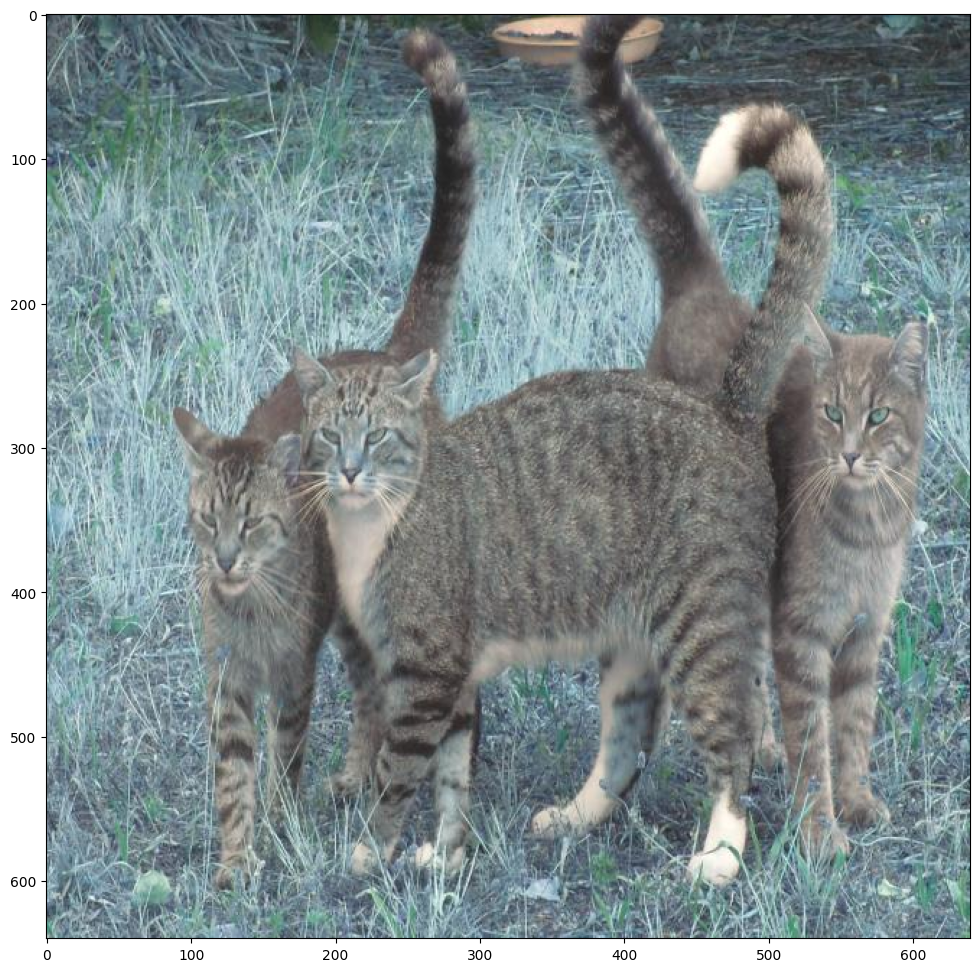

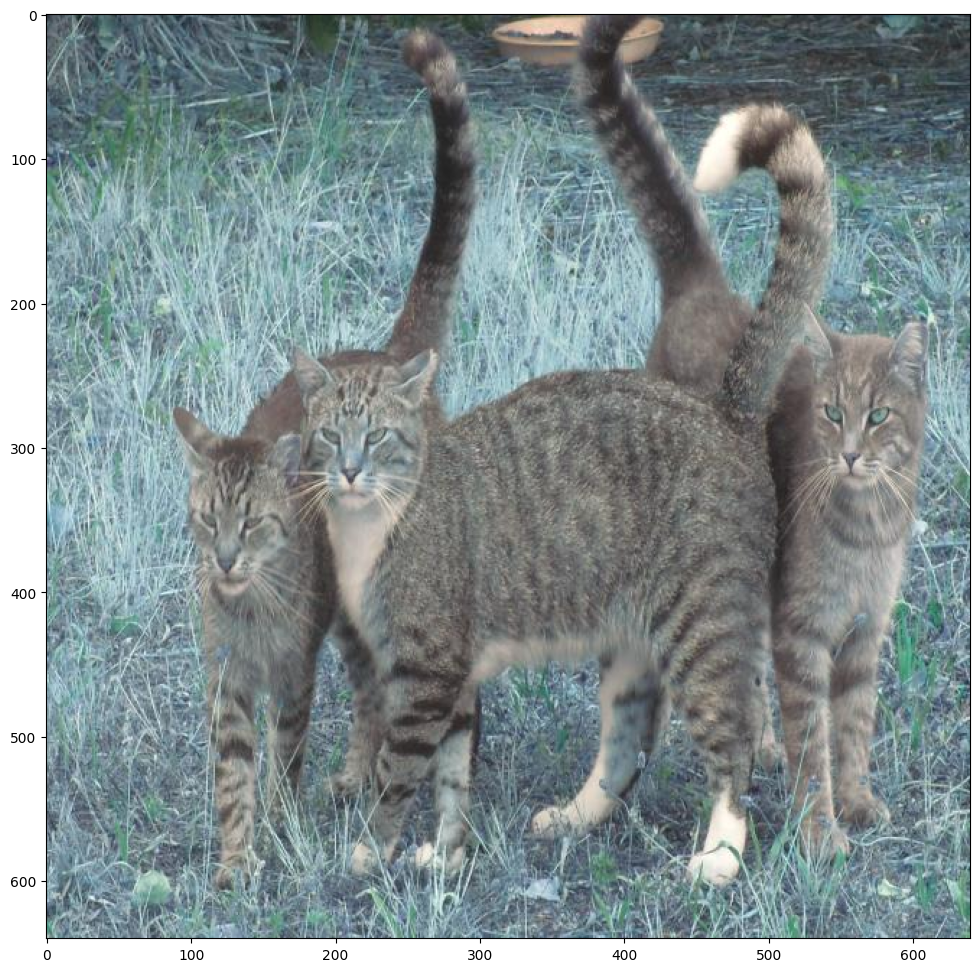

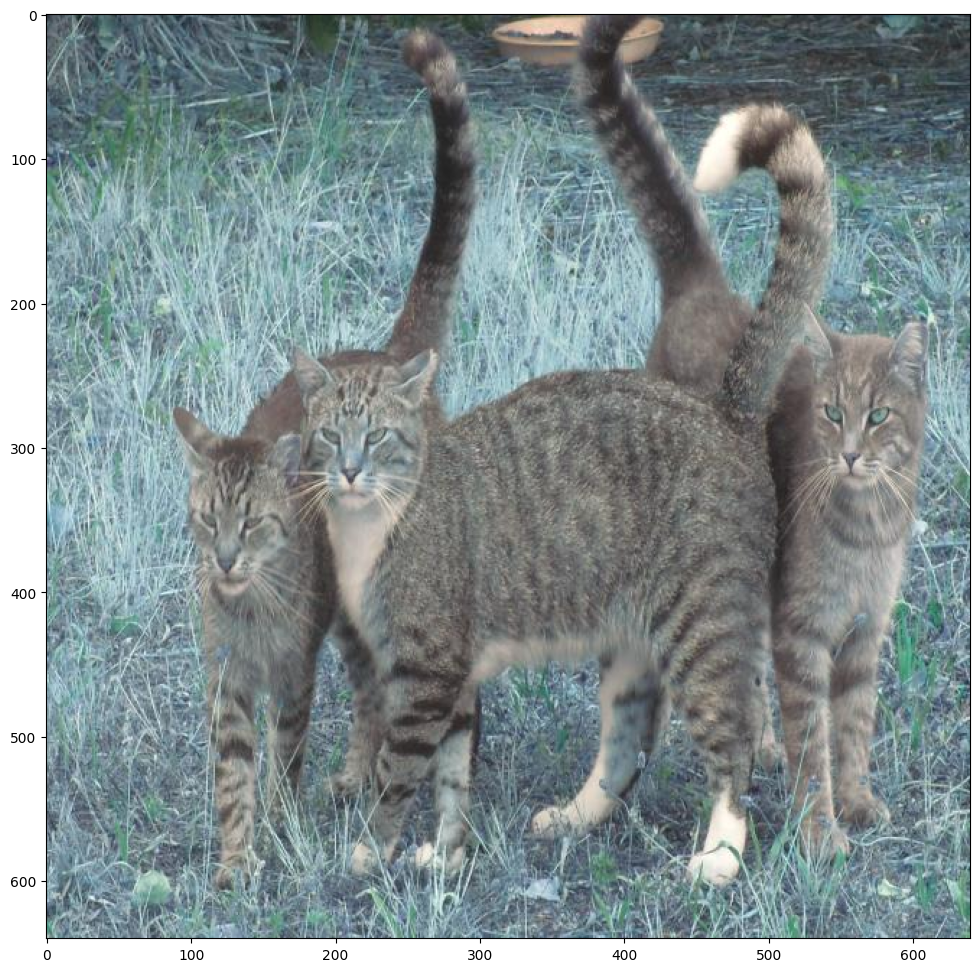

In [26]:
i += 1
new_image = Image.open(image_paths[i])
fileID = image_paths[i].split('/')[-1].split('.')[0].split('_')[0]
print('Index {}, file ID {}'.format(i, fileID))
plt.imshow(plt.imread(image_paths[i])) # Show the raw image without predictions
for conf in CONFIDENCE_THRESHOLDS:
  new_results = trained_model.predict(new_image, conf=conf, iou=0.5)
  new_result_array = new_results[0].plot()
  plt.figure(figsize=(12,12))
  plt.imshow(new_result_array);

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
